In [21]:
# python
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict

# sklearn
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# stats
import statsmodels.api as sm 

In [22]:
## Load Test/Train Data
DATA = {
    "C": {
        "train": {
            "X": np.loadtxt(open("a2-files/X_train_C.csv"), delimiter=","),
            "Y": np.loadtxt(open("a2-files/Y_train_C.csv"), delimiter=","),
        },
        "test": {
            "X": np.loadtxt(open("a2-files/X_test_C.csv"), delimiter=","),
            "Y": np.loadtxt(open("a2-files/Y_test_C.csv"), delimiter=","),
        }
    },
}


In [23]:
def gradient_descent_SVR_training(
    X: List[List[float]], 
    y: List[float], 
    # Configuration with Default Settings
    max_pass: int   = 250,
    eta: float      = 5e-4,   # >0
    C: float        = 1,
    epsilon: float  = 0.1,
)-> [List[float], float, Dict]:
    """
    @param          X: \in R^{nxd}
    @param          y: \in R^n 
    @param   max_pass: \in N
    @param        eta: step size
    @param        tol: tolerance
    @param       lamb: regulation weight '\lambda'
    """
    X = np.array(X)
    y = np.array(y)
    [n, d] = np.shape(X) 
    w = np.zeros(d) # w = 0_d
    b = 0
    mistake = []

    # logger ======
    training_log = {
        "t" : [],
        "w" : [],
        "b" : [],
        "training_error": [],
        "training_loss": [],
    }
    # training ====== ====== ====== ====== ======
    for t in range(0, max_pass): # max passes / iterations
        for i in range(n):
            x_i = X[i, :]
            y_i = y[i]
            # inner gradient ====== ====== ======
            f_err = ( np.dot(x_i, w) + b - y_i ) # pred - y
            if np.abs(f_err) >= epsilon:
                delta = eta * C * np.sign(f_err)
                w = w - delta * x_i
                b = b - delta
            # proximal step ==== ====== ====== ======
            w = w /( 1 + eta ) 

        # compute loss and error:
        y_pred = [np.dot(x_i, w) + b for x_i in X]
        error = C * sum(np.maximum(np.abs(y - y_pred) - epsilon, 0))
        loss  = error + 1/2 * (np.linalg.norm(w) ** 2)
        # log progress:
        training_log["t"].append(t)
        training_log["w"].append(w)
        training_log["b"].append(b)
        training_log["training_error"].append(error)
        training_log["training_loss"].append(loss)

    return w, b, training_log

def predict_and_evaluate(
    X: List[List[float]], 
    y: List[float], 
    w: List[float], 
    b: float,
    C: float        = 1,
    epsilon: float  = 0.1,
) -> [List[float], float]:
    """
    Perform Prediction and Evaluate
    """
    # test:
    y_pred = [np.dot(x_i, w) + b for x_i in X]
    test_error = C * sum(np.maximum(np.abs(y - y_pred) - epsilon, 0))
    return y_pred, test_error

def print_report(
    training_log: Dict,
    test_error: float,
    tag: str,
):
    # plot status
    plt.figure(figsize=(4, 5), dpi=100)
    fig1 = plt.gcf()
    ax1 = plt.subplot(211)
    plt.plot(training_log["t"], training_log["training_error"])
    plt.title("Training Progress")
    plt.ylabel("Training Error")
    # plt.savefig('figs/ex3-2_training_progress.png')
    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(training_log["t"], training_log["training_loss"])
    plt.ylabel("Training Loss")

    plt.xlabel("epochs")
    plt.show()
    fig1.savefig("figs/ex4_training_progress_{tag}.png".format(
        tag = tag
    ), bbox_inches = 'tight')

    print(training_log["t"][-1])
    print("> [{tag:8s}] T: {itr:3d} | Training Error: {train_err:.5f} \
        | Training Loss: {train_loss:.5f} | Test Error: {test_err:.5f}".format(
        tag         = tag,
        itr         = training_log["t"][-1],
        train_err   = training_log["training_error"][-1],
        train_loss  = training_log["training_loss"][-1],
        test_err    = test_error
    ))


In [24]:
w, b, training_log = gradient_descent_SVR_training(DATA["C"]["train"]["X"], DATA["C"]["train"]["Y"])

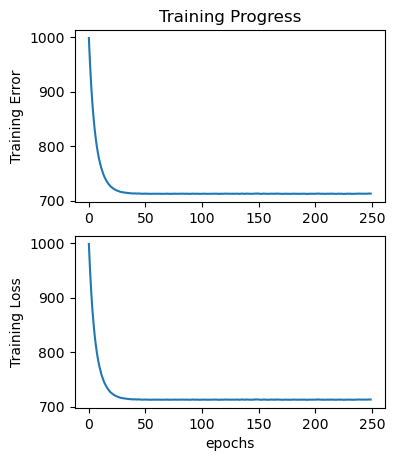

249
> [result  ] T: 249 | Training Error: 712.84065         | Training Loss: 713.37650 | Test Error: 891.05659


In [25]:
y_pred, test_error = predict_and_evaluate(DATA["C"]["test"]["X"], DATA["C"]["test"]["Y"],w,b)
print_report(training_log=training_log, test_error=test_error, tag="result")